In [2]:
import os.path as osp
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

import psutil
from tqdm import tqdm
import pandas as pd
import torch
from torch.utils.data import DataLoader
from torchmetrics import Accuracy


import sys
sys.path.append('/root/class/cmu/LSMA/ls-hw2/code')
from modules import FeatureDataModule, MlpClassifier, FeatureDataset

/root/anaconda3/envs/ls-hw2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Infer:  33%|███▎      | 1/3 [00:03<00:06,  3.38s/it]

tensor(0.9141, device='cuda:0')
tensor(0.9023, device='cuda:0')
tensor(0.9097, device='cuda:0')


Infer: 100%|██████████| 3/3 [00:08<00:00,  2.85s/it]

tensor(0.9087, device='cuda:0')


<AxesSubplot:>

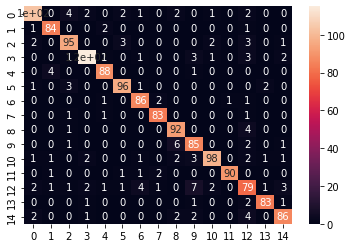

In [17]:
feature_dir = '/shared/youngkim/dataset/cnn_resnet50'
best_model_path = '/shared/youngkim/dataset/mlp/cnn/version_5/checkpoints/epoch=26-step=323-val_acc=0.9087.ckpt'


p1_df_path = '/shared/youngkim/dataset/labels/train_val.csv'
p1_df = pd.read_csv(p1_df_path)
train_df, val_df = train_test_split(p1_df, test_size=0.2, random_state=42)
dataset = FeatureDataset(df=val_df, feature_dir=feature_dir, p2=False)

dataloader = DataLoader(dataset, batch_size=512, drop_last=False, shuffle=False,
                        pin_memory=True, num_workers=len(psutil.Process().cpu_affinity()))

def validation(model, device, test_loader):
    model.eval()
    pred_y_list = []
    labels = []
    accs = []
    accuracy = Accuracy().to(device)
    for data, label in tqdm(test_loader, total=len(test_loader), desc='Infer', position=0, leave=True):
        data = data.to(device)
        label = label.to(device)
        
        with torch.no_grad():
            output = model(data)
            pred = output.argmax(dim=-1)
        acc = accuracy(output, label)
        accs.append(acc)
        pred_y_list.extend(pred.tolist())
        labels.extend(label.cpu().tolist())
    
    print(sum(accs)/len(accs))

    return pred_y_list, labels

model = MlpClassifier.load_from_checkpoint(best_model_path)
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

preds, labels = validation(model.to(device), device, dataloader)

cf_matrix = confusion_matrix(preds, labels)
sns.heatmap(cf_matrix, annot=True)

Infer:  33%|███▎      | 1/3 [00:03<00:06,  3.30s/it]

tensor(0.9297, device='cuda:0')
tensor(0.9102, device='cuda:0')
tensor(0.9013, device='cuda:0')


Infer: 100%|██████████| 3/3 [00:08<00:00,  2.81s/it]

tensor(0.9137, device='cuda:0')


<AxesSubplot:>

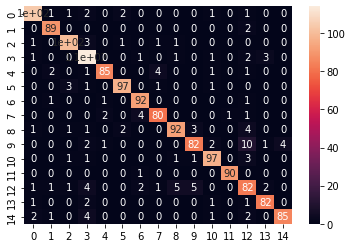

In [14]:
feature_dir = '/shared/youngkim/dataset/cnn'
best_model_path = '/shared/youngkim/dataset/mlp/cnn/version_0/checkpoints/epoch=56-step=683-val_acc=0.9140.ckpt'


p1_df_path = '/shared/youngkim/dataset/labels/train_val.csv'
p1_df = pd.read_csv(p1_df_path)
train_df, val_df = train_test_split(p1_df, test_size=0.2, random_state=42)
dataset = FeatureDataset(df=val_df, feature_dir=feature_dir, p2=False)

dataloader = DataLoader(dataset, batch_size=512, drop_last=False, shuffle=False,
                        pin_memory=True, num_workers=len(psutil.Process().cpu_affinity()))

def validation(model, device, test_loader):
    model.eval()
    pred_y_list = []
    labels = []
    accs = []
    accuracy = Accuracy().to(device)
    for data, label in tqdm(test_loader, total=len(test_loader), desc='Infer', position=0, leave=True):
        data = data.to(device)
        label = label.to(device)
        
        with torch.no_grad():
            output = model(data)
            pred = output.argmax(dim=-1)
        acc = accuracy(output, label)
        accs.append(acc)
        pred_y_list.extend(pred.tolist())
        labels.extend(label.cpu().tolist())
    
    print(sum(accs)/len(accs))

    return pred_y_list, labels

model = MlpClassifier.load_from_checkpoint(best_model_path)
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

preds, labels = validation(model.to(device), device, dataloader)

cf_matrix = confusion_matrix(labels, preds)
sns.heatmap(cf_matrix, annot=True)

Infer: 100%|██████████| 3/3 [00:20<00:00,  6.77s/it]

tensor(0.9438, device='cuda:0')


<AxesSubplot:>

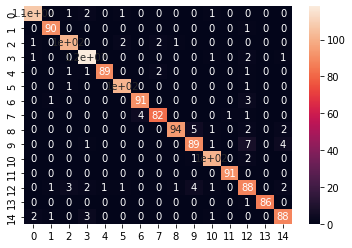

In [16]:
feature_dir = '/shared/youngkim/dataset/cnn_b4'
best_model_path = '/shared/youngkim/dataset/mlp/cnn/version_2/checkpoints/epoch=30-step=371-val_acc=0.9440.ckpt'


p1_df_path = '/shared/youngkim/dataset/labels/train_val.csv'
p1_df = pd.read_csv(p1_df_path)
train_df, val_df = train_test_split(p1_df, test_size=0.2, random_state=42)
dataset = FeatureDataset(df=val_df, feature_dir=feature_dir, p2=False)

dataloader = DataLoader(dataset, batch_size=512, drop_last=False, shuffle=False,
                        pin_memory=True, num_workers=len(psutil.Process().cpu_affinity()))

def validation(model, device, test_loader):
    model.eval()
    pred_y_list = []
    labels = []
    accs = []
    accuracy = Accuracy().to(device)
    for data, label in tqdm(test_loader, total=len(test_loader), desc='Infer', position=0, leave=True):
        data = data.to(device)
        label = label.to(device)
        
        with torch.no_grad():
            output = model(data)
            pred = output.argmax(dim=-1)
        acc = accuracy(output, label)
        accs.append(acc)
        pred_y_list.extend(pred.tolist())
        labels.extend(label.cpu().tolist())
    
    print(sum(accs)/len(accs))

    return pred_y_list, labels

model = MlpClassifier.load_from_checkpoint(best_model_path)
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

preds, labels = validation(model.to(device), device, dataloader)

cf_matrix = confusion_matrix(labels, preds)
sns.heatmap(cf_matrix, annot=True)